In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [34]:
# algos = ['atofigh', 'felerius', 'gabow', 'hollow', 'lemon', 'matrix', 'pq', 'set', 'spaghetti', 'treap', 'yosupo']
algos = ['gabow', 'spaghetti']
# colors = {
#     'atofigh': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
#     'felerius': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
#      'gabow': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
#      'hollow': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
#      'lemon': (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
#      'matrix': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
#      'pq': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0),
#      'set': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
#      'spaghetti': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
#      'treap': 'black',
#      'yosupo': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
# }

colors = {
    'atofigh': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
    'felerius': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
    'gabow': (0.0, 0.0, 1.0, 1.0),  # Modificado para azul
    'hollow': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
    'lemon': (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
    'matrix': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
    'pq': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0),
    'set': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
    'spaghetti': (1.0, 0.0, 0.0, 1.0),  # Modificado para vermelho
    'treap': 'black',
    'yosupo': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
}

marker = {
    'atofigh': '*',
    'felerius': '+',
    'gabow': 'D',
    'hollow': '>',
    'lemon': '2',
    'matrix': 's',
    'pq': '.',
    'set': 'P',
    'spaghetti': 'X',
    'treap': '^',
    'yosupo': 'p',
}
labels = {alg:alg for alg in algos}
labels['gabow'] = 'GGST'

In [35]:
repos = []
for data_set in ['konect', 'networkrepository', 'yosupo', 'antilemon', 'girgs']:
    csv_name = f'20220412_results/runtime-{data_set}.csv'
    if not os.path.isfile(csv_name):
        print(data_set, 'missing')
        continue
    repo = pd.read_csv(csv_name, index_col=['file','algo'])
    repo['total'] = repo.con + repo.run + repo.rec + repo['del']
    # fill missing file/algo combinations with -1
    completeIndex = pd.MultiIndex.from_product((repo.index.levels[0],algos),names=repo.index.names)
    repo = repo.reindex(completeIndex, fill_value=-1)
    repo['source'] = data_set
    repos.append(repo)

data = pd.concat(repos)

os.makedirs('temp_plots', exist_ok=True)

In [41]:
timed_out = data[data.n==-1].reset_index()
print('timeouts w/o matrix')
print(timed_out[timed_out.algo!='matrix'][["file","algo"]])

timeouts w/o matrix
                          file       algo
0      konect/dimacs9-CAL.soap  spaghetti
1      konect/dimacs9-CTR.soap  spaghetti
2        konect/dimacs9-E.soap  spaghetti
3      konect/dimacs9-LKS.soap  spaghetti
4       konect/dimacs9-NE.soap  spaghetti
5      konect/dimacs9-USA.soap  spaghetti
6        konect/dimacs9-W.soap  spaghetti
7  antilemon/anti1000000.wsoap  spaghetti


: 

gabow 443 200
spaghetti 112 0


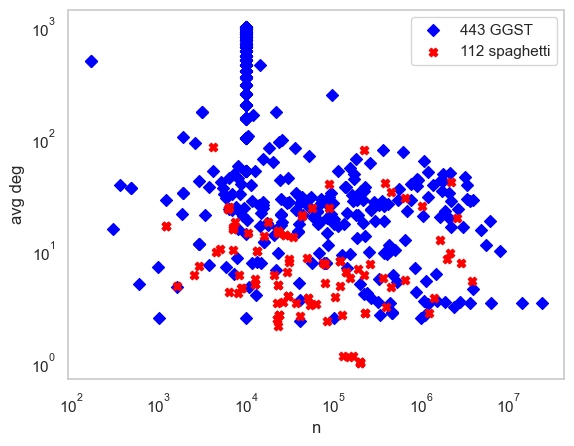

In [37]:
# w/o ties (all not timeout and untied best)
relevant = data[data.n!=-1].groupby('file').filter(lambda grp: (grp.total==grp.total.min()).sum()==1)
fastest = relevant.loc[relevant.groupby('file').total.idxmin()]

fastest['avg deg'] = fastest.m / fastest.n
for algo, grp in fastest.reset_index(level=1).groupby('algo'):
    print(algo, len(grp), len(grp[grp.source=='girgs']))
    plt.gca().scatter(grp['n'], grp['avg deg'], label=f'{len(grp)} {labels[algo]}', color=colors[algo], marker=marker[algo])

plt.loglog()
plt.legend(loc='upper right')
plt.grid()
plt.gca().set_axisbelow(True)
plt.xlabel('n')
plt.ylabel('avg deg')
plt.savefig('temp_plots/fastest.pdf', bbox_inches='tight')

In [38]:
relevant = data[data.n!=-1].groupby('file').filter(
    lambda grp: (grp.total==grp.total.min()).sum()==11 and grp.total.min()==0)
print(len(relevant.groupby('file')))
relevant = data[data.n!=-1].groupby('file').filter(
    lambda grp: (grp.total==grp.total.min()).sum()>1 and grp.total.min()==0)
print(len(relevant.groupby('file')))
relevant = data[data.n!=-1].groupby('file').filter(
    lambda grp: (grp.total==grp.total.min()).sum()>1 and grp.total.min()>0)
print(len(relevant.groupby('file')))
relevant = data[data.n!=-1].groupby('file').filter(
    lambda grp: (grp.total==grp.total.min()).sum()>1)
print(len(relevant.groupby('file')))

0
55
3
58


Text(0, 0.5, 'time in ms')

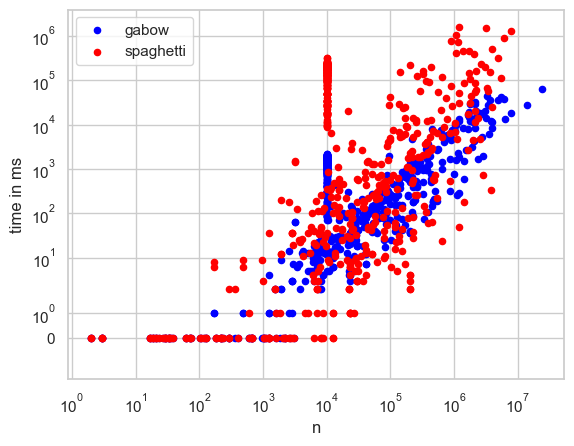

In [40]:
labels['gabow'] = 'GGST'
for algo, view in data.groupby('algo'):
    view.plot.scatter('n', 'total', ax=plt.gca(), label=algo, color=colors[algo])
plt.yscale('symlog')
plt.semilogx()
plt.ylabel('time in ms')

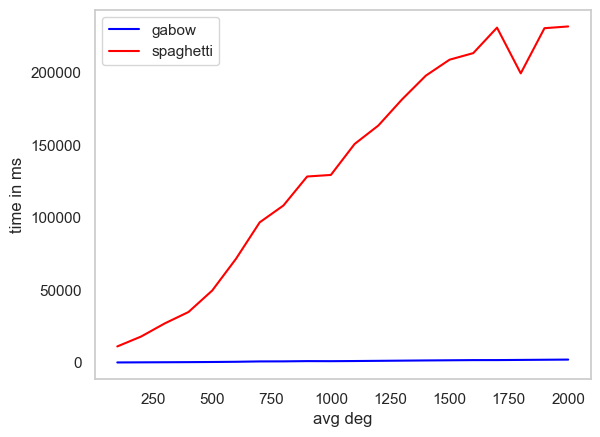

In [24]:
for algo,grp in data[(data.n!=-1) & (data.source=='girgs')].groupby('algo'):
    df = grp.reset_index()
    df['adeg'] = df['file'].str.slice(10,14).astype(int)
    avg_times = df.groupby('adeg').total.mean()
    # plt.plot(grp.m[:-1], grp.total[:-1], label=algo, color=colors[algo])
    plt.plot(avg_times.index.values, avg_times, label=labels[algo], color=colors[algo])

plt.legend()
plt.xlabel('avg deg')
plt.ylabel('time in ms')
plt.grid()
plt.savefig('temp_plots/time_density.pdf', bbox_inches='tight')

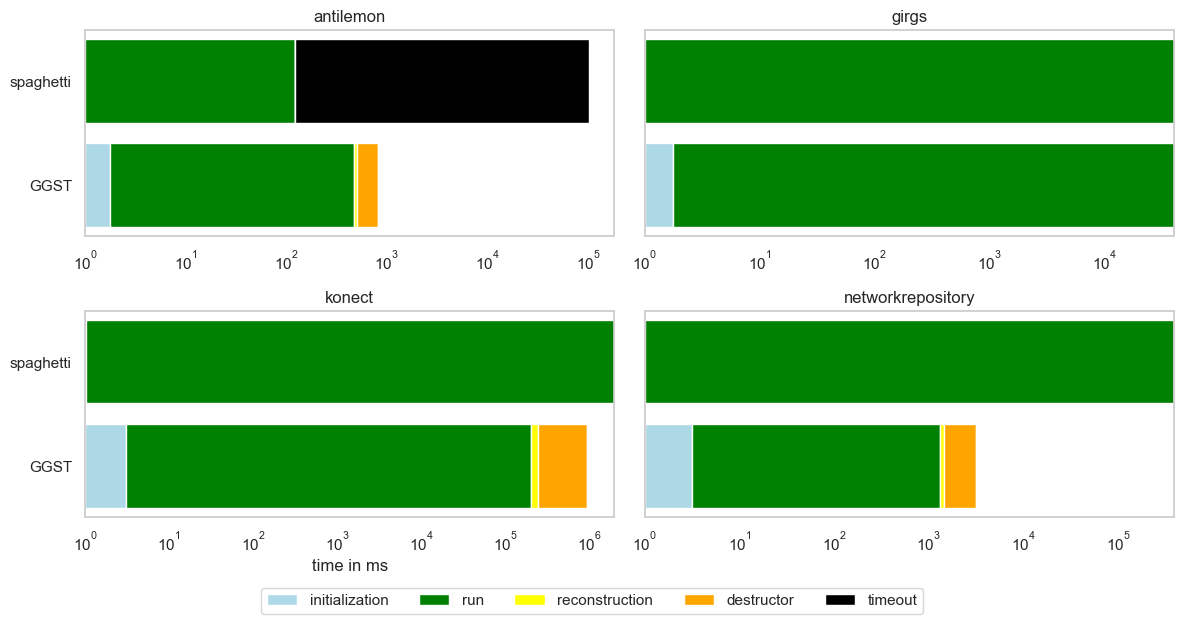

In [16]:
to_plot = [
    ('con', 'initialization','lightblue'), 
    ('run', 'run', 'green'), 
    ('rec','reconstruction', 'yellow'), 
    ('del','destructor', 'orange'),
    ('timeout','timeout', 'black')
]

grps = data.groupby('source')

fig, axs = plt.subplots(nrows=2, ncols=len(grps)//2, sharey=True, figsize=(12,6))
axs = axs.flatten()

for (source, view), ax in zip(grps,axs):
    view = view.copy()
    view['timeout'] = 0
 
    for col in ['run', 'con','rec','del', 'total']:
        view[col].replace(-1,0,inplace=True)
    view.loc[view.n==-1,'timeout'] = 60*1000

    timings = view.groupby(level=1).sum().reset_index()
    timings['total'] += timings['timeout']
    for col in ['run', 'con','rec','del', 'timeout']:
        timings[col] = timings['total'] ** (timings[col] / timings['total'])
    
    timings['offset'] = 1 # log of this is 0
    for column,label,color in to_plot:
        ax.barh(y=timings['algo'], width=timings.offset * timings[column] - timings.offset, left=timings.offset, 
                label=label, tick_label=list(labels.values()), color=color)
        timings['offset'] *= timings[column] # multiplying logs is same as adding in non-log
        
    ax.set_title(source)
    ax.semilogx()
    ax.set_xlim(left=1)
    ax.grid()
    ax.set_axisbelow(True)
    
axs[1].set_xlim(right=4e4)
axs[2].set_xlim(right=2e6)
#axs[5].set_xlim(right=2e8)
#axs[3].legend(loc='lower right', bbox_to_anchor=(2, -0.5), ncol=5)
axs[-2].set_xlabel('time in ms')

# external legend
fig.legend([x[1] for x in to_plot], loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.05))

fig.tight_layout()
plt.savefig('temp_plots/time_bar.pdf', bbox_inches='tight')

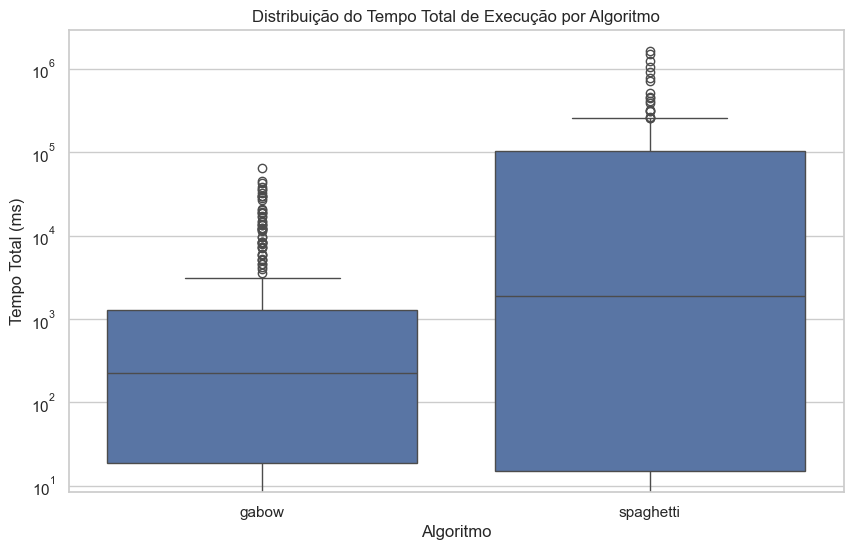

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
#. Boxplot ou Violinplot:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='algo', y='total', data=data)
plt.yscale('log')  # Se desejar escala logarítmica no eixo y
plt.xlabel('Algoritmo')
plt.ylabel('Tempo Total (ms)')
plt.title('Distribuição do Tempo Total de Execução por Algoritmo')
plt.show()

                                           n         m  weighted  \
file                       algo                                    
konect/advogato.soap       gabow        5043     52109         1   
                           spaghetti    5043     52109         1   
konect/amazon0601.soap     gabow      403365   3790588         1   
                           spaghetti  403365   3790588         1   
konect/cfinder-google.soap gabow       15764    186098         1   
...                                      ...       ...       ...   
girgs/girg2000_7.soap      spaghetti   10001  10008172         1   
girgs/girg2000_8.soap      gabow       10001  10010128         1   
                           spaghetti   10001  10010128         1   
girgs/girg2000_9.soap      gabow       10001  10011592         1   
                           spaghetti   10001  10011592         1   

                                               opt  con     run  rec  del  \
file                       algo       

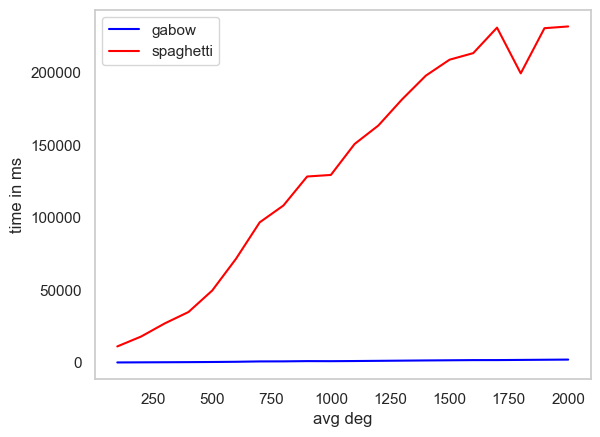

In [28]:
for algo,grp in data[(data.n!=-1) & (data.source=='girgs')].groupby('algo'):
    df = grp.reset_index()
    df['adeg'] = df['file'].str.slice(10,14).astype(int)
    avg_times = df.groupby('adeg').total.mean()
    # plt.plot(grp.m[:-1], grp.total[:-1], label=algo, color=colors[algo])
    plt.plot(avg_times.index.values, avg_times, label=labels[algo], color=colors[algo])

plt.legend()
print(data)
plt.xlabel('avg deg')
plt.ylabel('time in ms')
plt.grid()
plt.savefig('temp_plots/time_density.pdf', bbox_inches='tight')


# ['konect', 'networkrepository', 'yosupo', 'antilemon', 'girgs']:

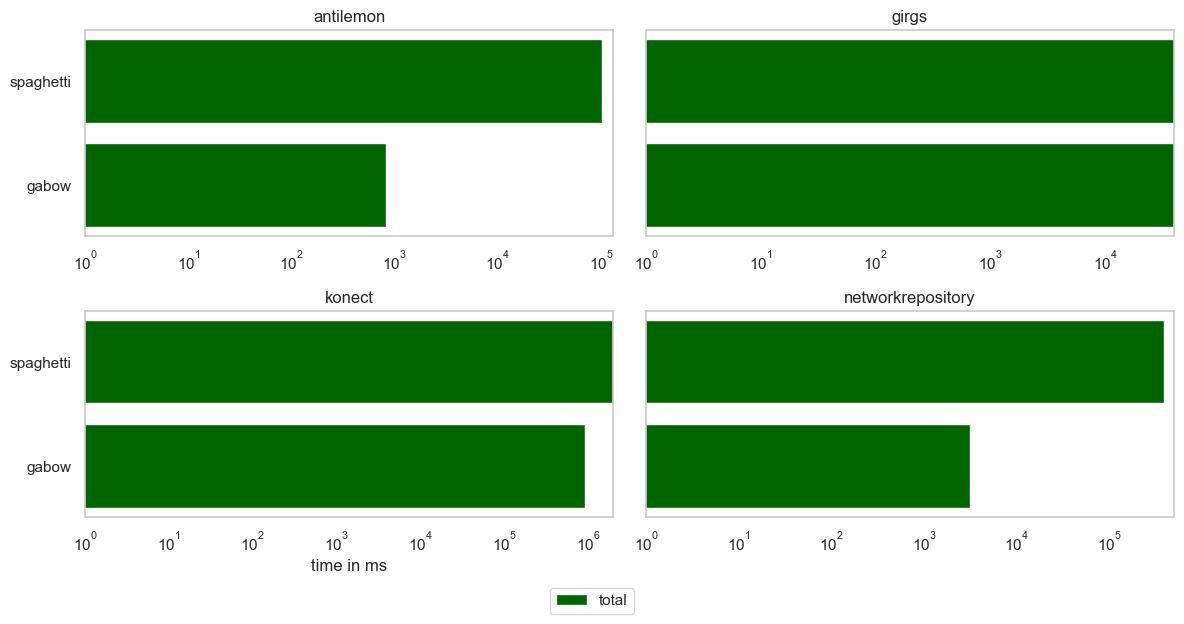

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

to_plot = [
    ('total', 'total', 'darkgreen'),  # Using dark green color for the total time
]

grps = data.groupby('source')

fig, axs = plt.subplots(nrows=2, ncols=len(grps) // 2, sharey=True, figsize=(12, 6))
axs = axs.flatten()

for (source, view), ax in zip(grps, axs):
    view = view.copy()
    view['timeout'] = 0

    for col in ['run', 'con', 'rec', 'del', 'total']:
        view[col].replace(-1, 0, inplace=True)
    view.loc[view.n == -1, 'timeout'] = 60 * 1000

    timings = view.groupby(level=1).sum().reset_index()
    timings['total'] += timings['timeout']

    ax.barh(y=timings['algo'], width=timings['total'], color='darkgreen')  # Using dark green color for the total time
    ax.set_title(source)
    ax.semilogx()
    ax.set_xlim(left=1)
    ax.grid()
    ax.set_axisbelow(True)

axs[1].set_xlim(right=4e4)
axs[2].set_xlim(right=2e6)
axs[-2].set_xlabel('time in ms')

# External legend
fig.legend([x[1] for x in to_plot], loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.05))

fig.tight_layout()
plt.savefig('temp_plots/time_bar.pdf', bbox_inches='tight')


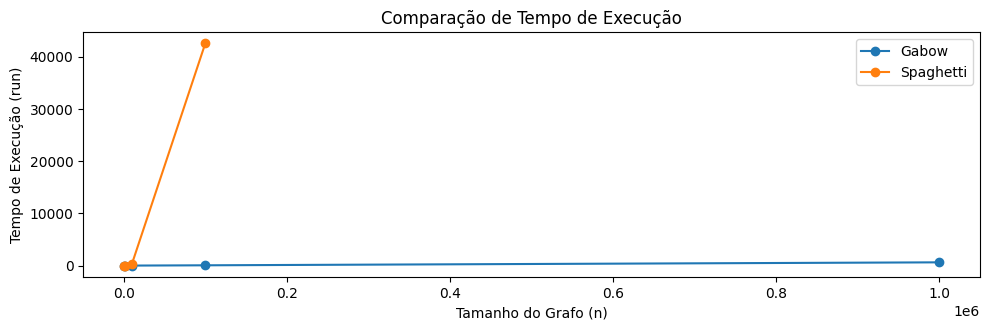

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do CSV para um DataFrame do pandas
df = pd.read_csv('20220412_results/runtime-antilemon.csv')

# Filtrar dados para cada algoritmo
df_gabow = df[df['algo'] == 'gabow']
df_spaghetti = df[df['algo'] == 'spaghetti']

# Plotar gráficos comparativos
plt.figure(figsize=(10, 6))

# Gráfico 1: Tempo de execução em função do tamanho do grafo
plt.subplot(2, 1, 1)
plt.plot(df_gabow['n'], df_gabow['run'], label='Gabow', marker='o')
plt.plot(df_spaghetti['n'], df_spaghetti['run'], label='Spaghetti', marker='o')
plt.xlabel('Tamanho do Grafo (n)')
plt.ylabel('Tempo de Execução (run)')
plt.title('Comparação de Tempo de Execução')
plt.legend()

# Ajustes de layout
plt.tight_layout()

# Exibir os gráficos
plt.show()
